Final Física Teórica 1 \
Daiana Dominikow - 2022 \
L.32529 \
Fuerzas centrales, método de Euler

In [75]:
import math
import scipy.constants
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,7)

In [76]:
def energia_potencial(m1_pos, m2_pos,mu, m1_p, m2_p, g_cte, l, t, dt  ):
    i=0
    Ug = []
    Uc = []
    Uef = []
    star1=m1_pos
    star2=m2_pos
    r = m2_pos - m1_pos
    r_norm = []
    star1p = m1_p
    star2p = m2_p
    t_len = len(t) -1

    while i<t_len:
        r = star2 - star1
        r_norm.append(np.linalg.norm(r))
        #para este grafico necesito la magnitud de la fuerza
        F2 = g_cte/r_norm[i]**2
        star1p = star1p - F2*dt
        star2p = star2p + F2*dt
        star1 = star1 + (star1p*dt)/m1
        star2 = star2 + (star2p*dt)/m2

        Ug.append(g_cte/r_norm[i])
        Uc.append(l**2/(2*mu*r_norm[i]**2))
        Uef.append(Uc[i]+ Ug[i])
        
        i=i+1


    plt.figure(1)    
    plt.plot(r_norm,Ug,'crimson',label='Ug')
    plt.plot(r_norm,Uc,'plum',label='Uc')
    plt.plot(r_norm,Uef,'teal',label='Uef')
    plt.xlabel("Distancia")
    plt.ylabel("Energia potencial")   
    plt.legend()
    plt.show()

In [77]:
def velocidad(m1_pos, m2_pos, m1, m2, m1_p, m2_p, g_cte, t, dt):
    i = 0
    r_norm = []
    r = m2_pos - m1_pos
    r_norm = []
    r_norm.append(np.linalg.norm(r))
    star1p = m1_p 
    star2p = m2_p
    star1 = m1_pos
    star2= m2_pos
    v1_norm = []
    v2_norm = []
    v1 = star1p/m1
    v2 = star2p/m2
    v1_norm.append(np.linalg.norm(v1))
    v2_norm.append(np.linalg.norm(v2))
    t_len = len(t) -1

    while i<t_len:
        r_uni = r / r_norm[i]
        #pero para este otro grafico necesito el vector fuerza
        F2 = g_cte*r_uni/r_norm[i]**2
        star1p = star1p - F2*dt
        star2p = star2p + F2*dt
        star1 = star1 + (star1p*dt)/m1
        star2 = star2 + (star2p*dt)/m2
        r = star2 - star1
        r_norm.append(np.linalg.norm(r))
        v1 = star1p/m1
        v2 = star2p/m2
        v1_norm.append(np.linalg.norm(v1))
        v2_norm.append(np.linalg.norm(v2))

        i=i+1

    figure, axis = plt.subplots(1,2,figsize=(14,7))
    axis[0].plot(t,v1_norm,'orange', label="masa 1")
    axis[0].plot(t,v2_norm,'pink', label="masa 2")
    axis[0].set_title("Evolución de la velocidad relativa de los cuerpos ")
    axis[0].legend(loc='upper left')

    axis[1].plot(r_norm,v1_norm,'orange',label= "masa 1")
    axis[1].plot(r_norm,v2_norm,'pink', label="masa 2")
    axis[1].set_title("Diagrama de fases")
    axis[1].legend(loc='upper left')




In [78]:
def posicion(m1_pos, m2_pos, m1, m2, m1_p, m2_p, g_cte, t, dt):
   
    i = 0
    r = []
    r.append(m2_pos - m1_pos)
    r_norm = []
    r_norm.append(np.linalg.norm(r))
    star1p=[]
    star2p=[]
    star1=[]
    star2=[]
    star1p.append(m1_p) 
    star2p.append(m2_p)
    star1.append(m1_pos)
    star2.append(m2_pos)
    t_len = len(t) -1

    while i<t_len:
        r_uni = r[i] / r_norm[i]
        #pero para este otro grafico necesito el vector fuerza
        F2 = g_cte*r_uni/r_norm[i]**2
        star1p.append(star1p[i] - F2*dt)
        star2p.append(star2p[i] + F2*dt)
        star1.append(star1[i] + (star1p[i+1]*dt)/m1)
        star2.append(star2[i] + (star2p[i+1]*dt)/m2)
        r.append(star2[i+1] - star1[i+1])
        r_norm.append(np.linalg.norm(r[i+1]))
        i=i+1

    star1= np.asarray(star1)
    star2= np.asarray(star2)
    star1v= np.asarray(star1p)/m1
    star2v= np.asarray(star2p)/m2 
    r = np.asarray(r)

    figure, axis = plt.subplots(1,3,figsize=(21,7))
    axis[0].plot(t,r_norm,'teal')
    axis[0].set_title("Evolución del radiovector r")
    axis[0].legend(loc='upper left')

    axis[1].plot(r[:,0],r[:,1],'crimson',label ='radiovector respecto al CM')
    axis[1].set_title("Radiovector respecto al CM")
    axis[1].legend(loc='upper left')

    axis[2].plot(star1[:,0],star1[:,1],'orange',label ='Posicion masa 1 respecto al CM')
    axis[2].plot(star2[:,0],star2[:,1],'pink', label ='Posicion masa 2 respecto al CM')
    axis[2].set_title("Posición de las estrellas respecto al CM")
    axis[2].legend(loc='upper left')


In [79]:
def movimiento_dos_cuerpos(masa1, masa2, distancia, tiempo, dt):
        
    #entran por parametro
    m1 = masa1 #masa de la primer estrella
    m2 = masa2 #masa de la segunda estrella
    d = distancia #distancia entre las estrellas
    tf = tiempo  
    dt = dt

    #cálculos
    t = np.arange(0 , tf + dt ,dt)
    M = m1+m2 
    mu = m1*m2/M #masa reducida
    #posición centros de masa
    x1 = -(m2/M)*d
    x2 = (m1/M)*d
    #posicion masas
    pos1_inicial = np.array([x1,0,0])
    pos2_inicial = np.array([x2,0,0])
    r = pos2_inicial - pos1_inicial

    #centro de masa
    cm = (pos1_inicial*m1 + pos2_inicial*m2)/M

    #ahora, les tengo que dar un momento inicial a ambas estrellas
    #solo necesito la velocidad  de una de ellas
    v_1 = math.sqrt((scipy.constants.G*m2**2)/(d*M))
    #para una orbita circular
    v1_inicial = np.array([0,v_1,0])

    #por conservacion del momento
    p1_inicial = m1*v1_inicial
    p2_inicial=-p1_inicial
    g_cte = -scipy.constants.G*m1*m2
    l = np.linalg.norm(np.cross(pos1_inicial,p1_inicial) + np.cross(pos2_inicial,p2_inicial))  
    
    energia_potencial(pos1_inicial,pos2_inicial, mu, p1_inicial, p2_inicial, g_cte, l, t, dt)
    posicion(pos1_inicial, pos2_inicial, m1, m2,p1_inicial, p2_inicial, g_cte, t, dt)
    velocidad(pos1_inicial, pos2_inicial, m1, m2,p1_inicial, p2_inicial, g_cte, t, dt)


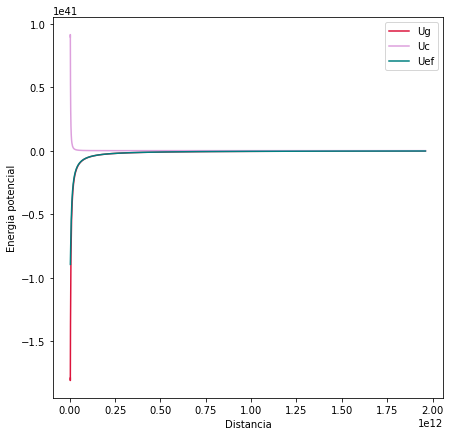

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


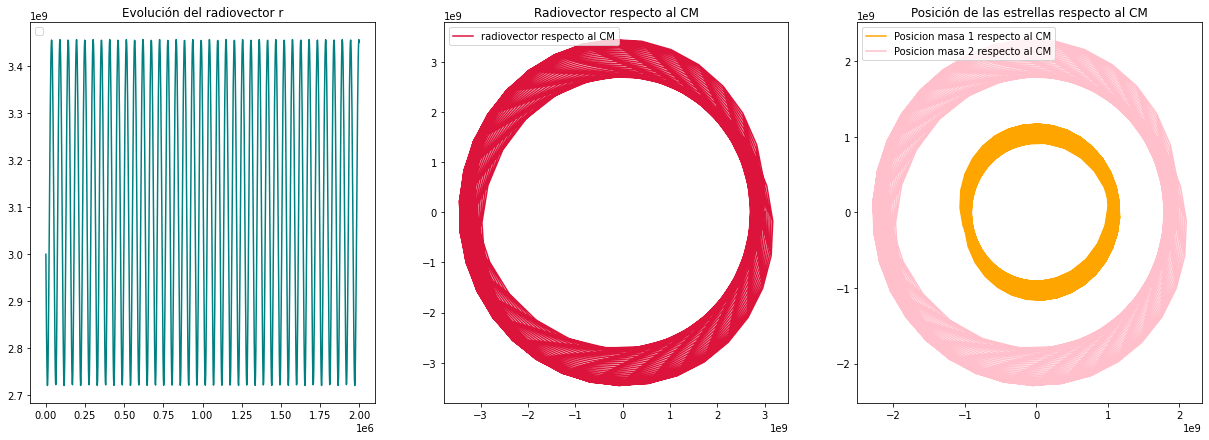

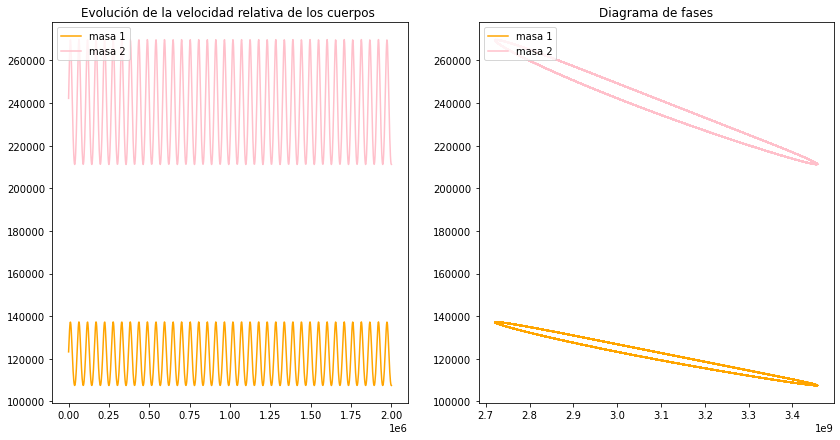

In [80]:
#Sistema de estrellas Sirius!!
m1 = 3.978e30 #masa de SiriusA
m2 = 2.025e30 #masa de SiriusB
d = 3e9 #distancia entre las estrellas
tf = 2e6  
dt = 2e3

movimiento_dos_cuerpos(m1,m2,d,tf,dt)